In [95]:
import pandas as pd

import pandas as pd

df = pd.read_csv('data/tennis.csv')

df.info()

df.isna().sum()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       8101 non-null   object 
 1   time       8101 non-null   object 
 2   game       8101 non-null   object 
 3   score      7617 non-null   object 
 4   home_odds  7964 non-null   float64
 5   draw_odds  0 non-null      float64
 6   away_odds  7964 non-null   float64
 7   country    6270 non-null   object 
 8   league     6270 non-null   object 
dtypes: float64(3), object(6)
memory usage: 569.7+ KB


date            0
time            0
game            0
score         484
home_odds     137
draw_odds    8101
away_odds     137
country      1831
league       1831
dtype: int64

In [96]:
df['date'] = pd.to_datetime(df['date'], format='%d %b %Y', errors='coerce')
df['date'] = df['date'].ffill()

df[['country', 'league']] = df[['country', 'league']].ffill()

df.drop(columns=['draw_odds'], inplace=True)

df.head(10)





,date,time,game,score,home_odds,away_odds,country,league
0,2024-12-20,01:00,Masabayashi T./Ochi M. – Hsieh C./Yang Z.,0:2,1.91,1.81,Indonesia,ITF M15 Bali 3 Men Doubles (hard)
1,2024-12-20,01:35,Raina A./Thombare P. – Morisaki K./Sato N.,0:2,1.85,1.86,India,ITF W50 Navi Mumbai Women Doubles (hard)
2,2024-12-20,01:40,Castelnuovo L./Wang A. – M Rifqi F./Susanto A.,2:0,1.30,3.35,Indonesia,ITF M15 Bali 3 Men Doubles (hard)
3,2024-12-20,01:50,Tian F. – Kovapitukted P.,2:0,1.19,4.24,India,ITF W50 Navi Mumbai Women (hard)
4,2024-12-20,02:40,Bouquet L. – Agamenone F.,0:2,3.92,1.21,Turkey,ITF M15 Antalya 20 Men (clay)
5,2024-12-20,02:40,Hodzic M. – Bojica S.,1:2,1.49,2.47,Turkey,ITF W15 Antalya 21 Women (clay)
6,2024-12-20,02:40,Demidova D. – Senic N.,0:2,5.59,1.11,Turkey,ITF W15 Antalya 21 Women (clay)
7,2024-12-20,02:45,Mashtakov N. – Cazacu D. N.,2:1,1.84,1.84,Turkey,ITF M15 Antalya 20 Men (clay)
8,2024-12-20,02:45,El Aouni A. – Shapatava S.,1:2,2.05,1.70,Turkey,ITF W15 Antalya 21 Women (clay)
9,2024-12-20,03:40,Bhatia R./Desai Z. – Bhamidipaty S. R./Kulamba...,2:1,3.18,1.30,India,ITF W50 Navi Mumbai Women Doubles (hard)


In [97]:
df = df.dropna(subset=['score', 'home_odds', 'away_odds'])

separated_scores = df['score'].str.split(':', expand=True)
separated_scores = separated_scores.astype(int)
separated_scores.columns = ['sets_player1', 'sets_player2']

df = pd.concat([df, separated_scores], axis=1)

df['winner_player1'] = (df['sets_player1'] > df['sets_player2']).astype(int)
df['winner_player2'] = (df['sets_player2'] > df['sets_player1']).astype(int)

df.head(10)


,date,time,game,score,home_odds,away_odds,country,league,sets_player1,sets_player2,winner_player1,winner_player2
0,2024-12-20,01:00,Masabayashi T./Ochi M. – Hsieh C./Yang Z.,0:2,1.91,1.81,Indonesia,ITF M15 Bali 3 Men Doubles (hard),0,2,0,1
1,2024-12-20,01:35,Raina A./Thombare P. – Morisaki K./Sato N.,0:2,1.85,1.86,India,ITF W50 Navi Mumbai Women Doubles (hard),0,2,0,1
2,2024-12-20,01:40,Castelnuovo L./Wang A. – M Rifqi F./Susanto A.,2:0,1.30,3.35,Indonesia,ITF M15 Bali 3 Men Doubles (hard),2,0,1,0
3,2024-12-20,01:50,Tian F. – Kovapitukted P.,2:0,1.19,4.24,India,ITF W50 Navi Mumbai Women (hard),2,0,1,0
4,2024-12-20,02:40,Bouquet L. – Agamenone F.,0:2,3.92,1.21,Turkey,ITF M15 Antalya 20 Men (clay),0,2,0,1
5,2024-12-20,02:40,Hodzic M. – Bojica S.,1:2,1.49,2.47,Turkey,ITF W15 Antalya 21 Women (clay),1,2,0,1
6,2024-12-20,02:40,Demidova D. – Senic N.,0:2,5.59,1.11,Turkey,ITF W15 Antalya 21 Women (clay),0,2,0,1
7,2024-12-20,02:45,Mashtakov N. – Cazacu D. N.,2:1,1.84,1.84,Turkey,ITF M15 Antalya 20 Men (clay),2,1,1,0
8,2024-12-20,02:45,El Aouni A. – Shapatava S.,1:2,2.05,1.70,Turkey,ITF W15 Antalya 21 Women (clay),1,2,0,1
9,2024-12-20,03:40,Bhatia R./Desai Z. – Bhamidipaty S. R./Kulamba...,2:1,3.18,1.30,India,ITF W50 Navi Mumbai Women Doubles (hard),2,1,1,0


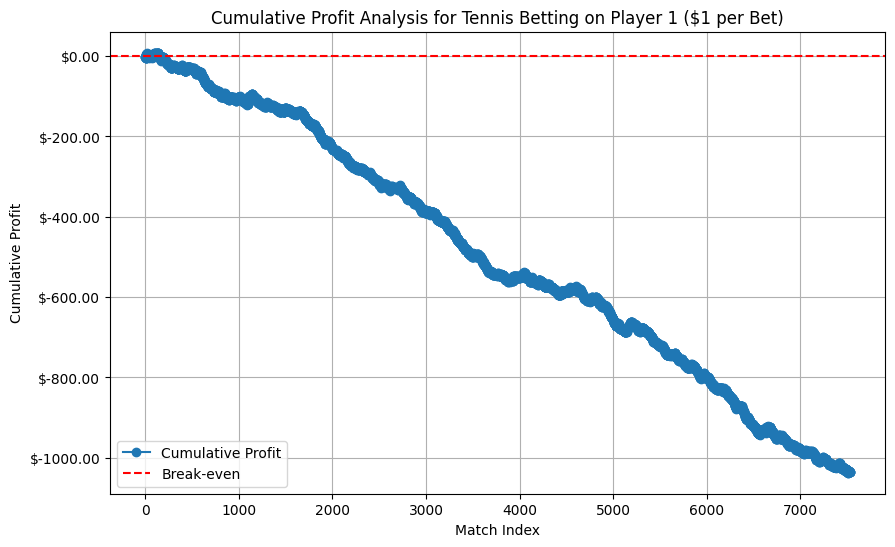

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter


df['profit'] = np.where(df['winner_player1'] < 1, -1, df['home_odds'] - 1)

df['cumulative_profit'] = df['profit'].cumsum()

def format_currency(value, tick_number):
    return f'${value:.2f}'

df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cumulative_profit'], marker='o', label='Cumulative Profit')
plt.axhline(0, color='red', linestyle='--', label='Break-even')
plt.title('Cumulative Profit Analysis for Tennis Betting on Player 1 ($1 per Bet)')
plt.xlabel('Match Index')
plt.ylabel('Cumulative Profit')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))
plt.legend()
plt.grid()
plt.show()


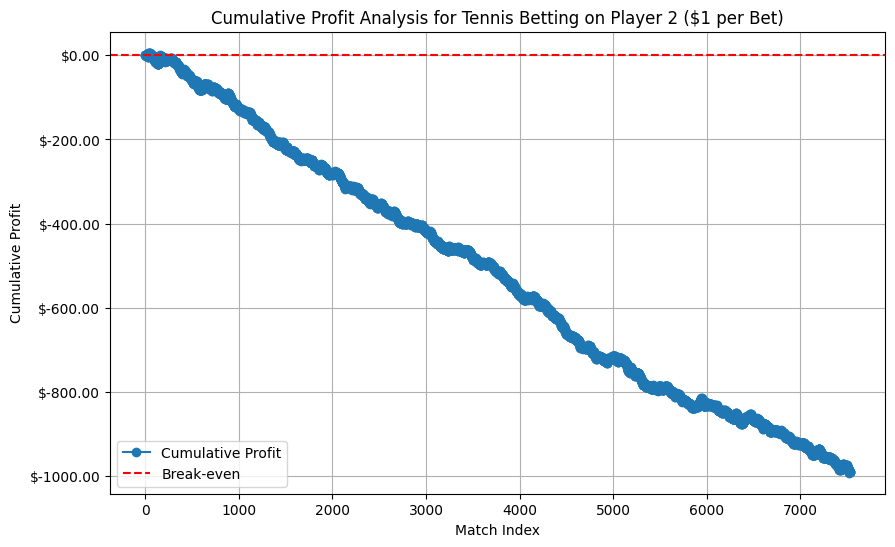

In [99]:
df['profit'] = np.where(df['winner_player1'] == 1, -1, df['away_odds'] - 1)

df['cumulative_profit'] = df['profit'].cumsum()

def format_currency(value, tick_number):
    return f'${value:.2f}'

df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cumulative_profit'], marker='o', label='Cumulative Profit')
plt.axhline(0, color='red', linestyle='--', label='Break-even')
plt.title('Cumulative Profit Analysis for Tennis Betting on Player 2 ($1 per Bet)')
plt.xlabel('Match Index')
plt.ylabel('Cumulative Profit')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))
plt.legend()
plt.grid()
plt.show()

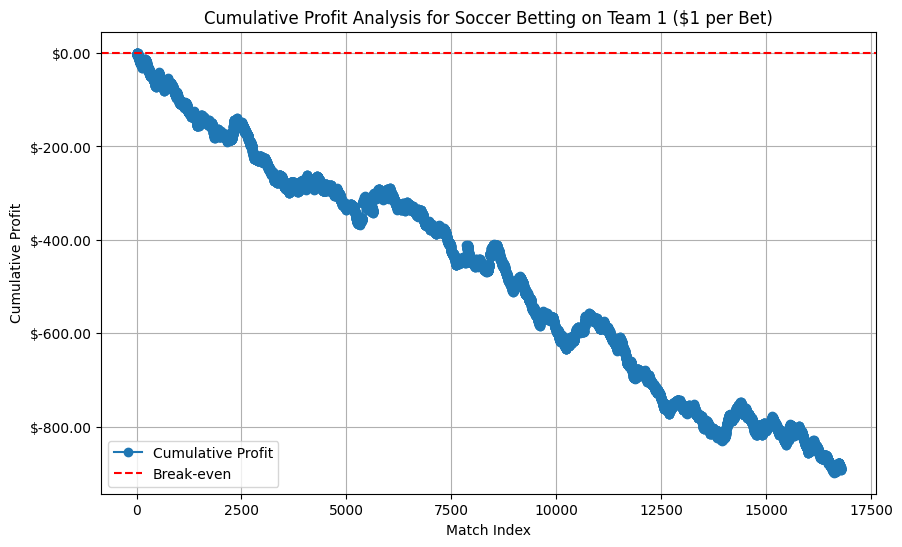

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

df = pd.read_csv(
    'data/soccer.csv',
    sep=',',
    skip_blank_lines=True,
    usecols=['date', 'time', 'game', 'score', 'home_odds', 'draw_odds', 'away_odds', 'country', 'league'],
    dtype={'score': str, 'league': str}
)

df = df.dropna(subset=['score', 'home_odds', 'away_odds', 'draw_odds'])

separated_scores = df['score'].str.split(':', expand=True)
separated_scores = separated_scores.astype(int)
separated_scores.columns = ['goals_team1', 'goals_team2']

df = pd.concat([df, separated_scores], axis=1)

df['winner_team1'] = (df['goals_team1'] > df['goals_team2']).astype(int)
df['winner_team2'] = (df['goals_team2'] > df['goals_team1']).astype(int)
df['draw'] = (df['goals_team1'] == df['goals_team2']).astype(int)

df['profit'] = np.where(df['winner_team1'] < 1, -1, df['home_odds'] - 1)

df['cumulative_profit'] = df['profit'].cumsum()


def format_currency(value, tick_number):
    return f'${value:.2f}'

df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cumulative_profit'], marker='o', label='Cumulative Profit')
plt.axhline(0, color='red', linestyle='--', label='Break-even')
plt.title('Cumulative Profit Analysis for Soccer Betting on Team 1 ($1 per Bet)')
plt.xlabel('Match Index')
plt.ylabel('Cumulative Profit')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))
plt.legend()
plt.grid()
plt.show()












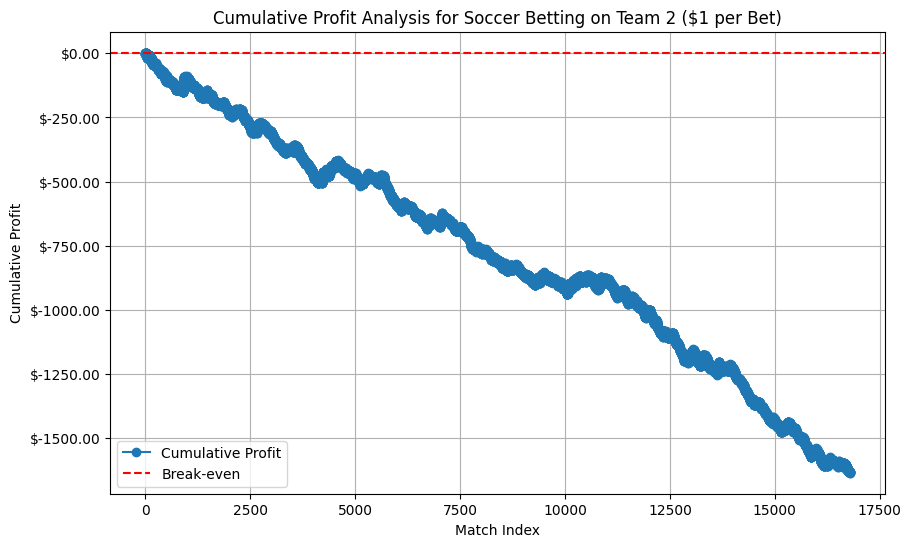

In [101]:
df['profit'] = np.where(df['winner_team2'] < 1, -1, df['away_odds'] - 1)

df['cumulative_profit'] = df['profit'].cumsum()

def format_currency(value, tick_number):
    return f'${value:.2f}'

df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cumulative_profit'], marker='o', label='Cumulative Profit')
plt.axhline(0, color='red', linestyle='--', label='Break-even')
plt.title('Cumulative Profit Analysis for Soccer Betting on Team 2 ($1 per Bet)')
plt.xlabel('Match Index')
plt.ylabel('Cumulative Profit')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))
plt.legend()
plt.grid()
plt.show()

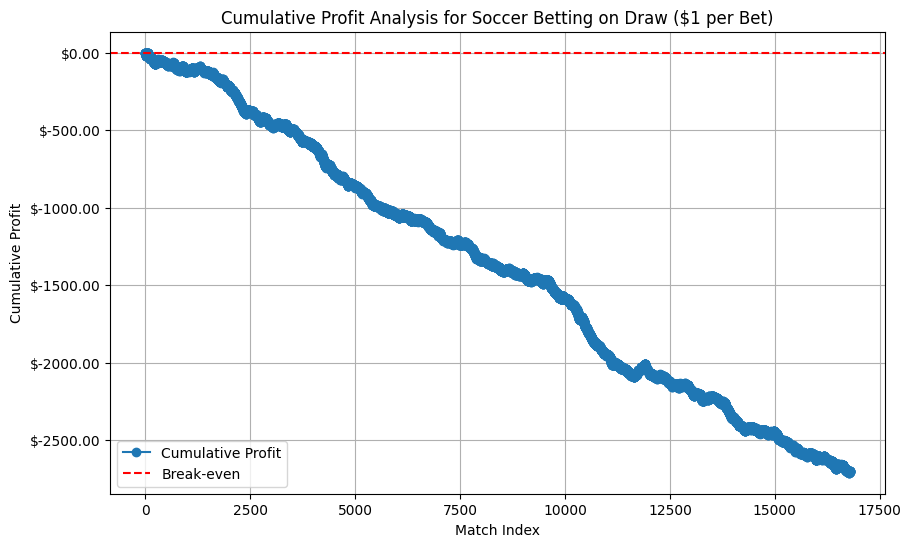

In [102]:
df['profit'] = np.where(df['draw'] < 1, -1, df['draw_odds'] - 1)

df['cumulative_profit'] = df['profit'].cumsum()

def format_currency(value, tick_number):
    return f'${value:.2f}'

df.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['cumulative_profit'], marker='o', label='Cumulative Profit')
plt.axhline(0, color='red', linestyle='--', label='Break-even')
plt.title('Cumulative Profit Analysis for Soccer Betting on Draw ($1 per Bet)')
plt.xlabel('Match Index')
plt.ylabel('Cumulative Profit')
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_currency))
plt.legend()
plt.grid()
plt.show()